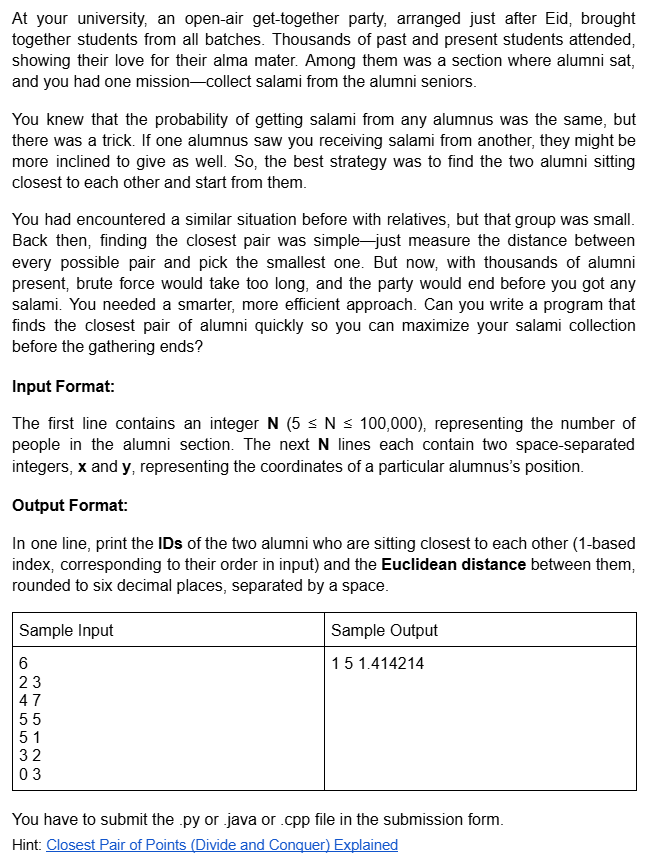

In [4]:
import math
N = int(input())
array = [tuple(map(int, input().split())) for x in range(N)]
arrayX = sorted(array, key=lambda p: p[0])
arrayY = sorted(array, key=lambda p: p[1])

def ClosestPair(arrX, arrY):
  XLen = len(arrX)
  if XLen == 2:
    return *arrX[0:2], math.dist(arrX[0], arrX[1])
  if XLen == 3:
    disL = math.dist(arrX[0], arrX[1])
    disM = math.dist(arrX[1], arrX[2])
    disR = math.dist(arrX[0], arrX[2])
    min_d = min(disL, disM, disR)
    if min_d == disL:
      return arrX[0], arrX[1], disL
    elif min_d == disM:
      return arrX[1], arrX[2], disM
    else:
      return arrX[0], arrX[2], disR
  mid = XLen // 2
  x1, y1, dL = ClosestPair(arrX[:mid:], arrY)
  x2, y2, dR = ClosestPair(arrX[mid + 1::], arrY)
  d = dL
  best = (x1, y1)
  if dL > dR:
    d = dR
    best = (x2, y2)

  Strip = [p for p in arrY if abs(p[1] - mid) < d]
  for x in range(len(Strip)):
    for y in range(x + 1, min(x + 7, len(Strip))):
      L, R = Strip[x], Strip[y]
      distance = math.dist(L, R)
      if d > distance:
        d = distance
        best = (L, R)
  return best, d
pairs, dist = ClosestPair(arrayX, arrayY)
res_pair = ()
idx = 0
for x in range(len(array)):
  if idx < len(pairs) and ((pairs[idx][0] == array[x][0]) and (pairs[idx][1] == array[x][1])):
    res_pair += (x + 1,)
    idx += 1
print(*res_pair, round(dist, 6))

6
2 3
4 7
5 5
5 1
3 2
0 3
1 5 1.414214
